<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA4/blob/master/Session7/EVA4S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4/python_files/')
from all_imports import *
import get_train_test as tt
import train_test_loader as ttl
import get_model as gm
import train_test_def as ttd



CUDA Available? True


In [0]:
# sys.path

In [4]:
train = tt.get_train('CIFAR10')
test = tt.get_test('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_loader, test_loader = ttl.get_train_test_loader(train,test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = gm.get_model_instance(0.10).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
          Dropout-12          [-1, 128, 32, 32]               0
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14           [-1

In [7]:
# model =  Net().to(device)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
# criterion = nn.CrossEntropyLoss()
# criterion1 = nn.CrossEntropyLoss(reduction='sum')
model = gm.get_model_instance(0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    a,b = ttd.train(model, device, train_loader, optimizer, epoch)
    train_losses.extend(a)
    train_acc.extend(b)
    c,d = ttd.test(model, device, test_loader)
    test_losses.extend(c)
    test_acc.extend(d)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2175145149230957 Batch_id=390 Accuracy=44.13: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3186, Accuracy: 5209/10000 (52.09%)


EPOCH: 2


Loss=1.050176978111267 Batch_id=390 Accuracy=60.71: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9747, Accuracy: 6542/10000 (65.42%)


EPOCH: 3


Loss=0.6981700658798218 Batch_id=390 Accuracy=68.27: 100%|██████████| 391/391 [00:16<00:00, 23.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8469, Accuracy: 7005/10000 (70.05%)


EPOCH: 4


Loss=0.6491316556930542 Batch_id=390 Accuracy=72.03: 100%|██████████| 391/391 [00:16<00:00, 23.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8191, Accuracy: 7131/10000 (71.31%)


EPOCH: 5


Loss=0.6363690495491028 Batch_id=390 Accuracy=74.46: 100%|██████████| 391/391 [00:16<00:00, 29.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7171, Accuracy: 7526/10000 (75.26%)


EPOCH: 6


Loss=0.5428001284599304 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:16<00:00, 29.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6991, Accuracy: 7608/10000 (76.08%)


EPOCH: 7


Loss=0.7192869782447815 Batch_id=390 Accuracy=77.56: 100%|██████████| 391/391 [00:16<00:00, 23.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6315, Accuracy: 7809/10000 (78.09%)


EPOCH: 8


Loss=0.5664512515068054 Batch_id=390 Accuracy=78.53: 100%|██████████| 391/391 [00:16<00:00, 23.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6421, Accuracy: 7794/10000 (77.94%)


EPOCH: 9


Loss=0.45877909660339355 Batch_id=390 Accuracy=79.74: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6780, Accuracy: 7697/10000 (76.97%)


EPOCH: 10


Loss=0.38580286502838135 Batch_id=390 Accuracy=80.55: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6017, Accuracy: 7935/10000 (79.35%)


EPOCH: 11


Loss=0.4795950949192047 Batch_id=390 Accuracy=81.21: 100%|██████████| 391/391 [00:16<00:00, 28.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5584, Accuracy: 8096/10000 (80.96%)


EPOCH: 12


Loss=0.4626583158969879 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6302, Accuracy: 7875/10000 (78.75%)


EPOCH: 13


Loss=0.5420868992805481 Batch_id=390 Accuracy=82.17: 100%|██████████| 391/391 [00:16<00:00, 27.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5805, Accuracy: 8016/10000 (80.16%)


EPOCH: 14


Loss=0.5575292110443115 Batch_id=390 Accuracy=82.81: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6302, Accuracy: 7859/10000 (78.59%)


EPOCH: 15


Loss=0.5152953863143921 Batch_id=390 Accuracy=83.27: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5366, Accuracy: 8189/10000 (81.89%)


EPOCH: 16


Loss=0.4838113784790039 Batch_id=390 Accuracy=85.84: 100%|██████████| 391/391 [00:16<00:00, 23.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4885, Accuracy: 8320/10000 (83.20%)


EPOCH: 17


Loss=0.47640785574913025 Batch_id=390 Accuracy=86.87: 100%|██████████| 391/391 [00:16<00:00, 29.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4746, Accuracy: 8346/10000 (83.46%)


EPOCH: 18


Loss=0.2425730675458908 Batch_id=390 Accuracy=86.78: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4748, Accuracy: 8385/10000 (83.85%)


EPOCH: 19


Loss=0.3702388405799866 Batch_id=390 Accuracy=87.39: 100%|██████████| 391/391 [00:16<00:00, 29.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4723, Accuracy: 8404/10000 (84.04%)


EPOCH: 20


Loss=0.6586035490036011 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4769, Accuracy: 8408/10000 (84.08%)


EPOCH: 21


Loss=0.3224501609802246 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [00:16<00:00, 28.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4697, Accuracy: 8401/10000 (84.01%)


EPOCH: 22


Loss=0.29889312386512756 Batch_id=390 Accuracy=87.64: 100%|██████████| 391/391 [00:16<00:00, 24.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4762, Accuracy: 8393/10000 (83.93%)


EPOCH: 23


Loss=0.3689076900482178 Batch_id=390 Accuracy=87.79: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4700, Accuracy: 8426/10000 (84.26%)


EPOCH: 24


Loss=0.38550814986228943 Batch_id=390 Accuracy=87.81: 100%|██████████| 391/391 [00:16<00:00, 24.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4668, Accuracy: 8403/10000 (84.03%)


EPOCH: 25


Loss=0.22423811256885529 Batch_id=390 Accuracy=88.11: 100%|██████████| 391/391 [00:15<00:00, 24.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4707, Accuracy: 8432/10000 (84.32%)


EPOCH: 26


Loss=0.30389928817749023 Batch_id=390 Accuracy=88.24: 100%|██████████| 391/391 [00:16<00:00, 28.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4643, Accuracy: 8414/10000 (84.14%)


EPOCH: 27


Loss=0.34681373834609985 Batch_id=390 Accuracy=88.21: 100%|██████████| 391/391 [00:16<00:00, 24.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4636, Accuracy: 8459/10000 (84.59%)


EPOCH: 28


Loss=0.4103527069091797 Batch_id=390 Accuracy=88.26: 100%|██████████| 391/391 [00:16<00:00, 24.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4649, Accuracy: 8430/10000 (84.30%)


EPOCH: 29


Loss=0.309379518032074 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [00:16<00:00, 23.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4737, Accuracy: 8419/10000 (84.19%)


EPOCH: 30


Loss=0.32792311906814575 Batch_id=390 Accuracy=88.51: 100%|██████████| 391/391 [00:16<00:00, 24.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4655, Accuracy: 8456/10000 (84.56%)


EPOCH: 31


Loss=0.3946620523929596 Batch_id=390 Accuracy=88.59: 100%|██████████| 391/391 [00:16<00:00, 29.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4631, Accuracy: 8415/10000 (84.15%)


EPOCH: 32


Loss=0.51075679063797 Batch_id=390 Accuracy=88.89: 100%|██████████| 391/391 [00:16<00:00, 24.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4667, Accuracy: 8448/10000 (84.48%)


EPOCH: 33


Loss=0.19237351417541504 Batch_id=390 Accuracy=88.99: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4646, Accuracy: 8467/10000 (84.67%)


EPOCH: 34


Loss=0.2727115750312805 Batch_id=390 Accuracy=88.94: 100%|██████████| 391/391 [00:16<00:00, 28.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4616, Accuracy: 8470/10000 (84.70%)


EPOCH: 35


Loss=0.216386079788208 Batch_id=390 Accuracy=88.80: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4675, Accuracy: 8452/10000 (84.52%)


EPOCH: 36


Loss=0.2502634823322296 Batch_id=390 Accuracy=88.74: 100%|██████████| 391/391 [00:16<00:00, 23.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4562, Accuracy: 8477/10000 (84.77%)


EPOCH: 37


Loss=0.3000727891921997 Batch_id=390 Accuracy=89.18: 100%|██████████| 391/391 [00:16<00:00, 29.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4543, Accuracy: 8471/10000 (84.71%)


EPOCH: 38


Loss=0.26573413610458374 Batch_id=390 Accuracy=88.97: 100%|██████████| 391/391 [00:15<00:00, 28.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4577, Accuracy: 8490/10000 (84.90%)


EPOCH: 39


Loss=0.20895203948020935 Batch_id=390 Accuracy=89.18: 100%|██████████| 391/391 [00:16<00:00, 23.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4541, Accuracy: 8469/10000 (84.69%)


EPOCH: 40


Loss=0.336913526058197 Batch_id=390 Accuracy=89.12: 100%|██████████| 391/391 [00:16<00:00, 29.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4599, Accuracy: 8459/10000 (84.59%)


EPOCH: 41


Loss=0.3491317331790924 Batch_id=390 Accuracy=89.17: 100%|██████████| 391/391 [00:15<00:00, 24.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4570, Accuracy: 8503/10000 (85.03%)


EPOCH: 42


Loss=0.22293519973754883 Batch_id=390 Accuracy=89.18: 100%|██████████| 391/391 [00:16<00:00, 24.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4673, Accuracy: 8445/10000 (84.45%)


EPOCH: 43


Loss=0.22532904148101807 Batch_id=390 Accuracy=89.08: 100%|██████████| 391/391 [00:15<00:00, 28.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4620, Accuracy: 8474/10000 (84.74%)


EPOCH: 44


Loss=0.20946097373962402 Batch_id=390 Accuracy=89.14: 100%|██████████| 391/391 [00:15<00:00, 24.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4604, Accuracy: 8472/10000 (84.72%)


EPOCH: 45


Loss=0.41429242491722107 Batch_id=390 Accuracy=89.17: 100%|██████████| 391/391 [00:16<00:00, 28.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4561, Accuracy: 8487/10000 (84.87%)


EPOCH: 46


Loss=0.489857017993927 Batch_id=390 Accuracy=89.12: 100%|██████████| 391/391 [00:16<00:00, 24.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4604, Accuracy: 8485/10000 (84.85%)


EPOCH: 47


Loss=0.3917050361633301 Batch_id=390 Accuracy=89.12: 100%|██████████| 391/391 [00:15<00:00, 29.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4604, Accuracy: 8466/10000 (84.66%)


EPOCH: 48


Loss=0.37298306822776794 Batch_id=390 Accuracy=89.22: 100%|██████████| 391/391 [00:16<00:00, 24.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4631, Accuracy: 8472/10000 (84.72%)


EPOCH: 49


Loss=0.33624592423439026 Batch_id=390 Accuracy=89.32: 100%|██████████| 391/391 [00:15<00:00, 28.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4601, Accuracy: 8473/10000 (84.73%)


EPOCH: 50


Loss=0.37975063920021057 Batch_id=390 Accuracy=89.25: 100%|██████████| 391/391 [00:16<00:00, 29.64it/s]



Test set: Average loss: 0.4539, Accuracy: 8502/10000 (85.02%)




Text(0.5, 1.0, 'Test Accuracy')

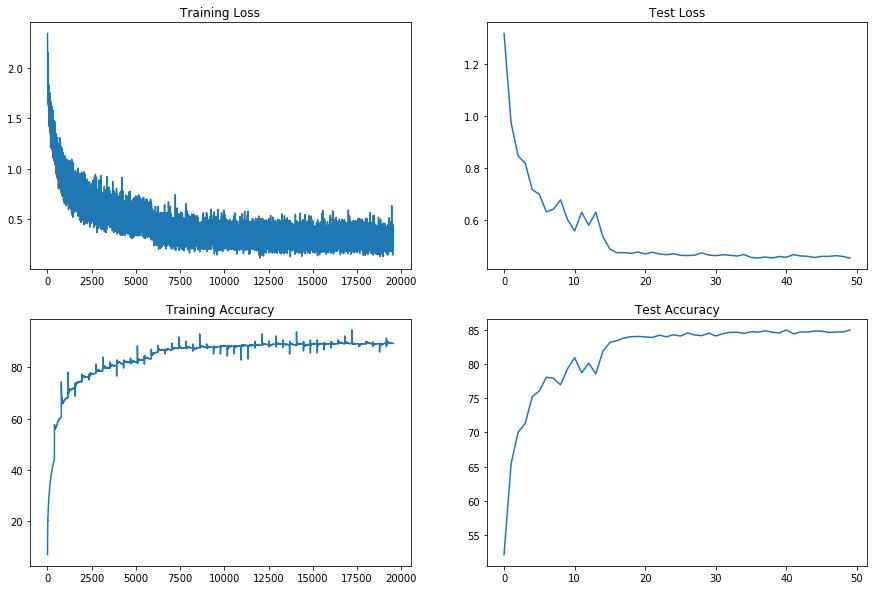

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")